In [441]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import plotly

In [442]:
# 컬럼명 수가 길어질 때 컬럼들이 잘리는 것을 방지합니다.

pd.options.display.max_columns = None

In [443]:
# 학습 데이터셋을 불러옵니다.

train = pd.read_csv('Auction_master_train.csv')
train.shape

(1933, 41)

In [444]:
# 테스트 데이터셋을 불러옵니다.

test = pd.read_csv('Auction_master_test.csv')
test.shape

(829, 41)

In [445]:
# 문자열과 정수형이 모두 존재합니다.

train.head()

,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,First_auction_date,Final_auction_date,Final_result,Creditor,addr_do,addr_si,addr_dong,addr_li,addr_san,addr_bunji1,addr_bunji2,addr_etc,Apartment_usage,Preserve_regist_date,Total_floor,Current_floor,Specific,Share_auction_YorN,road_name,road_bunji1,road_bunji2,Close_date,Close_result,point.y,point.x,Hammer_price
0,2687,임의,개별,1766037301,정명감정,2017-07-26 00:00:00,2,1,12592.0,37.35,37.35,181.77,181.77,836000000,668800000,2018-02-13 00:00:00,2018-03-20 00:00:00,낙찰,베리타스자산관리대부,부산,해운대구,우동,NaN,N,1398.0,NaN,해운대엑소디움 5층 101-502호,주상복합,2009-07-14 00:00:00,45,5,NaN,N,해운대해변로,30.0,NaN,2018-06-14 00:00:00,배당,35.162717,129.137048,760000000
1,2577,임의,일반,152946867,희감정,2016-09-12 00:00:00,2,1,42478.1,18.76,18.76,118.38,118.38,1073000000,858400000,2016-12-29 00:00:00,2017-02-02 00:00:00,낙찰,흥국저축은행,부산,해운대구,우동,NaN,N,1407.0,NaN,해운대두산위브더제니스 103동 51층 5103호,아파트,2011-12-16 00:00:00,70,51,NaN,N,마린시티2로,33.0,NaN,2017-03-30 00:00:00,배당,35.156633,129.145068,971889999
2,2197,임의,개별,11326510,혜림감정,2016-11-22 00:00:00,3,2,149683.1,71.00,71.00,49.94,49.94,119000000,76160000,2017-07-28 00:00:00,2017-10-13 00:00:00,낙찰,국민은행,부산,사상구,모라동,NaN,N,552.0,NaN,백양그린 206동 14층 1403호,아파트,1992-07-31 00:00:00,15,14,NaN,N,모라로110번길,88.0,NaN,2017-12-13 00:00:00,배당,35.184601,128.996765,93399999
3,2642,임의,일반,183581724,신라감정,2016-12-13 00:00:00,2,1,24405.0,32.98,32.98,84.91,84.91,288400000,230720000,2017-07-20 00:00:00,2017-11-02 00:00:00,낙찰,고려저축은행,부산,남구,대연동,NaN,N,243.0,23.0,대연청구 109동 11층 1102호,아파트,2001-07-13 00:00:00,20,11,NaN,N,황령대로319번가길,110.0,NaN,2017-12-27 00:00:00,배당,35.154180,129.089081,256899000
4,1958,강제,일반,45887671,나라감정,2016-03-07 00:00:00,2,1,774.0,45.18,45.18,84.96,84.96,170000000,136000000,2016-07-06 00:00:00,2016-08-03 00:00:00,낙찰,Private,부산,사하구,괴정동,NaN,N,399.0,2.0,동조리젠시 7층 703호,아파트,2001-11-27 00:00:00,7,7,NaN,N,오작로,51.0,NaN,2016-10-04 00:00:00,배당,35.099630,128.998874,158660000


In [446]:
# 이렇게 보아서는 인사이트를 확인하기 어려워 보입니다.

train.describe()

,Auction_key,Claim_price,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,addr_bunji1,addr_bunji2,Total_floor,Current_floor,road_bunji1,road_bunji2,point.y,point.x,Hammer_price
count,1933.000000,1.933000e+03,1933.000000,1933.000000,1.933000e+03,1933.000000,1933.000000,1933.000000,1933.000000,1.933000e+03,1.933000e+03,1929.000000,889.000000,1933.000000,1933.000000,1909.000000,155.000000,1933.000000,1933.000000,1.933000e+03
mean,1380.271081,3.703908e+08,1.836006,0.788412,3.458714e+04,42.333802,41.310776,96.417693,94.148810,4.973592e+08,4.155955e+08,601.952307,22.742407,16.980859,8.817900,127.441069,12.748387,36.698018,127.731667,4.726901e+08
std,801.670470,1.337869e+09,0.938319,0.831715,9.442101e+04,65.274404,65.385900,106.323240,106.845985,7.873851e+08,5.030312e+08,554.119824,67.000807,9.509021,8.044644,188.394217,10.735663,1.150269,0.993055,5.574493e+08
min,1.000000,0.000000e+00,1.000000,0.000000,0.000000e+00,0.000000,0.000000,9.390000,1.500000,4.285000e+06,4.285000e+06,1.000000,1.000000,3.000000,0.000000,1.000000,1.000000,35.051386,126.809393,6.303000e+06
25%,691.000000,7.746112e+07,1.000000,0.000000,2.997000e+03,25.870000,24.570000,61.520000,59.970000,2.090000e+08,1.750000e+08,189.000000,1.000000,12.000000,3.000000,24.000000,5.000000,35.188590,126.959167,1.975550e+08
50%,1395.000000,1.728143e+08,2.000000,1.000000,1.424140e+04,37.510000,36.790000,84.900000,84.860000,3.600000e+08,3.120000e+08,482.000000,5.000000,15.000000,7.000000,57.000000,9.000000,37.500862,127.065003,3.544500e+08
75%,2062.000000,3.565089e+08,2.000000,1.000000,4.140310e+04,51.790000,51.320000,114.940000,114.850000,5.720000e+08,4.864000e+08,834.000000,18.000000,21.000000,12.000000,145.000000,17.500000,37.566116,129.018054,5.599000e+08
max,2762.000000,2.286481e+10,13.000000,9.000000,3.511936e+06,2665.840000,2665.840000,4255.070000,4255.070000,2.777500e+10,1.422080e+10,4937.000000,1414.000000,80.000000,65.000000,1716.000000,55.000000,37.685575,129.255872,1.515100e+10


In [447]:
# 데이터의 정보를 확인합니다.
# 결측치는 없어, 관련 전처리는 생략합니다.
# 0으로 누락된 내용이 있을 수도 있으나, 시각화를 통해 확인할 예정입니다.

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1933 entries, 0 to 1932
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Auction_key                  1933 non-null   int64  
 1   Auction_class                1933 non-null   object 
 2   Bid_class                    1933 non-null   object 
 3   Claim_price                  1933 non-null   int64  
 4   Appraisal_company            1933 non-null   object 
 5   Appraisal_date               1933 non-null   object 
 6   Auction_count                1933 non-null   int64  
 7   Auction_miscarriage_count    1933 non-null   int64  
 8   Total_land_gross_area        1933 non-null   float64
 9   Total_land_real_area         1933 non-null   float64
 10  Total_land_auction_area      1933 non-null   float64
 11  Total_building_area          1933 non-null   float64
 12  Total_building_auction_area  1933 non-null   float64
 13  Total_appraisal_pr

In [448]:
# 테스트셋의 내용 또한 확인합니다. 
# 이하 동일이지만 예의상 해줍니다.

test.head()

,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,First_auction_date,Final_auction_date,Final_result,Creditor,addr_do,addr_si,addr_dong,addr_li,addr_san,addr_bunji1,addr_bunji2,addr_etc,Apartment_usage,Preserve_regist_date,Total_floor,Current_floor,Specific,Share_auction_YorN,road_name,road_bunji1,road_bunji2,Close_date,Close_result,point.y,point.x,Hammer_price
0,1778,강제,개별,1087000000,대한감정,2012-06-11 00:00:00,7,6,532.0,18.22,18.22,107.28,107.28,244565981,100174000,2013-07-04 00:00:00,2016-05-27 00:00:00,낙찰,Private,부산,동래구,낙민동,NaN,N,236.0,NaN,",237-2 삼주 5층 502호",주상복합,1111-11-11 00:00:00,15,5,"**1차감정:235,000,000",N,0,NaN,NaN,2017-06-29 00:00:00,배당,35.201112,129.088687,0
1,1779,강제,개별,1087000000,대한감정,2012-06-11 00:00:00,6,5,532.0,16.65,16.65,98.08,98.08,228745632,117118000,2013-07-04 00:00:00,2016-04-29 00:00:00,낙찰,Private,부산,동래구,낙민동,NaN,N,236.0,NaN,",237-2 삼주 6층 601호",주상복합,1111-11-11 00:00:00,15,6,"**1차감정:220,000,000",N,0,NaN,NaN,2017-06-29 00:00:00,배당,35.201112,129.088687,0
2,1784,강제,개별,1087000000,대한감정,2012-06-11 00:00:00,7,6,532.0,18.22,18.22,107.28,107.28,249565981,102222000,2013-07-04 00:00:00,2016-05-27 00:00:00,낙찰,Private,부산,동래구,낙민동,NaN,N,236.0,NaN,",237-2 삼주 8층 802호",주상복합,1111-11-11 00:00:00,15,8,"**1차감정: 240,000,000",N,0,NaN,NaN,2017-06-29 00:00:00,배당,35.201112,129.088687,0
3,1786,강제,개별,1087000000,대한감정,2012-06-11 00:00:00,7,6,532.0,18.22,18.22,107.28,107.28,249565981,102222000,2013-07-04 00:00:00,2016-05-27 00:00:00,낙찰,Private,부산,동래구,낙민동,NaN,N,236.0,NaN,",237-2 삼주 9층 902호",주상복합,1111-11-11 00:00:00,15,9,"**1차감정: 240,000,000",N,0,NaN,NaN,2017-06-29 00:00:00,배당,35.201112,129.088687,0
4,1790,강제,개별,1087000000,대한감정,2012-06-11 00:00:00,7,6,532.0,18.22,18.22,107.28,107.28,249565981,102222000,2013-07-04 00:00:00,2016-05-27 00:00:00,낙찰,Private,부산,동래구,낙민동,NaN,N,236.0,NaN,",237-2 삼주 11층 1102호",주상복합,1111-11-11 00:00:00,15,11,"**1차감정: 240,000,000",N,0,NaN,NaN,2017-06-29 00:00:00,배당,35.201112,129.088687,0


In [449]:
test.describe()

,Auction_key,Claim_price,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,addr_bunji1,addr_bunji2,Total_floor,Current_floor,road_bunji1,road_bunji2,point.y,point.x,Hammer_price
count,829.000000,8.290000e+02,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,8.290000e+02,8.290000e+02,828.000000,370.000000,829.000000,829.000000,819.000000,48.000000,829.000000,829.000000,829.0
mean,1384.365501,4.011555e+08,1.864897,0.827503,31236.418577,53.925790,38.782364,92.682075,90.966236,4.689385e+08,3.994422e+08,598.933575,18.348649,17.330519,8.728589,132.225885,14.166667,36.700317,127.731406,0.0
std,788.045077,1.399894e+09,0.961121,0.869736,47442.870260,415.169353,21.437563,39.384598,40.281167,4.159967e+08,3.574703e+08,574.828253,44.921190,8.730910,6.834476,195.034682,13.502298,1.150267,0.988724,0.0
min,2.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,11.300000,6.770000,7.833333e+06,5.014000e+06,1.000000,1.000000,2.000000,-1.000000,1.000000,1.000000,35.052039,126.806640,0.0
25%,696.000000,8.335727e+07,1.000000,0.000000,3597.000000,25.750000,24.580000,59.990000,59.950000,2.287456e+08,1.864000e+08,181.000000,1.000000,12.000000,4.000000,26.000000,5.000000,35.193550,126.957944,0.0
50%,1364.000000,1.830358e+08,2.000000,1.000000,13236.800000,36.590000,36.260000,84.880000,84.850000,3.600000e+08,3.040000e+08,463.000000,5.000000,15.000000,7.000000,58.000000,11.500000,37.507449,127.072564,0.0
75%,2097.000000,3.513686e+08,2.000000,1.000000,39204.200000,49.970000,49.630000,114.870000,114.840000,5.700000e+08,4.872000e+08,844.000000,15.000000,21.000000,12.000000,162.000000,21.250000,37.560722,129.013459,0.0
max,2761.000000,2.132829e+10,9.000000,6.000000,331281.000000,11977.420000,177.520000,267.100000,267.100000,4.224000e+09,4.224000e+09,4933.000000,587.000000,70.000000,43.000000,1799.000000,83.000000,37.685575,129.255872,0.0


In [450]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829 entries, 0 to 828
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Auction_key                  829 non-null    int64  
 1   Auction_class                829 non-null    object 
 2   Bid_class                    829 non-null    object 
 3   Claim_price                  829 non-null    int64  
 4   Appraisal_company            829 non-null    object 
 5   Appraisal_date               829 non-null    object 
 6   Auction_count                829 non-null    int64  
 7   Auction_miscarriage_count    829 non-null    int64  
 8   Total_land_gross_area        829 non-null    float64
 9   Total_land_real_area         829 non-null    float64
 10  Total_land_auction_area      829 non-null    float64
 11  Total_building_area          829 non-null    float64
 12  Total_building_auction_area  829 non-null    float64
 13  Total_appraisal_pric

In [451]:
# 원핫 인코딩 전, 정수형 데이터부터 처리해봅니다.
# 정수형 데이터 컬럼명만 추출하기 위해서 자료형 데이터프레임을 만듭니다.

types = pd.DataFrame(train.dtypes)
types.head()

,0
Auction_key,int64
Auction_class,object
Bid_class,object
Claim_price,int64
Appraisal_company,object


In [452]:
# 인덱스에 컬럼명들이 들어갔으므로 정수형인 경우의 컬럼들만 추출했습니다.
types[types[0] == 'int64'].index

Index(['Auction_key', 'Claim_price', 'Auction_count',
       'Auction_miscarriage_count', 'Total_appraisal_price',
       'Minimum_sales_price', 'Total_floor', 'Current_floor', 'Hammer_price'],
      dtype='object')

In [453]:
# train_int라는 변수에 데이터프레임을 넣어 train 변수와 구분해줍니다.

train_int = train[['Auction_key', 'Claim_price', 'Auction_count',
       'Auction_miscarriage_count', 'Total_appraisal_price',
       'Minimum_sales_price', 'Total_floor', 'Current_floor', 'Hammer_price']]
train_int.head()

,Auction_key,Claim_price,Auction_count,Auction_miscarriage_count,Total_appraisal_price,Minimum_sales_price,Total_floor,Current_floor,Hammer_price
0,2687,1766037301,2,1,836000000,668800000,45,5,760000000
1,2577,152946867,2,1,1073000000,858400000,70,51,971889999
2,2197,11326510,3,2,119000000,76160000,15,14,93399999
3,2642,183581724,2,1,288400000,230720000,20,11,256899000
4,1958,45887671,2,1,170000000,136000000,7,7,158660000


In [454]:
# 테스트셋도 변수로 구분해줍니다.


test_int = test[['Auction_key', 'Claim_price', 'Auction_count',
       'Auction_miscarriage_count', 'Total_appraisal_price',
       'Minimum_sales_price', 'Total_floor', 'Current_floor','Hammer_price']]
test_int.head()

,Auction_key,Claim_price,Auction_count,Auction_miscarriage_count,Total_appraisal_price,Minimum_sales_price,Total_floor,Current_floor,Hammer_price
0,1778,1087000000,7,6,244565981,100174000,15,5,0
1,1779,1087000000,6,5,228745632,117118000,15,6,0
2,1784,1087000000,7,6,249565981,102222000,15,8,0
3,1786,1087000000,7,6,249565981,102222000,15,9,0
4,1790,1087000000,7,6,249565981,102222000,15,11,0


<AxesSubplot:ylabel='Hammer_price'>

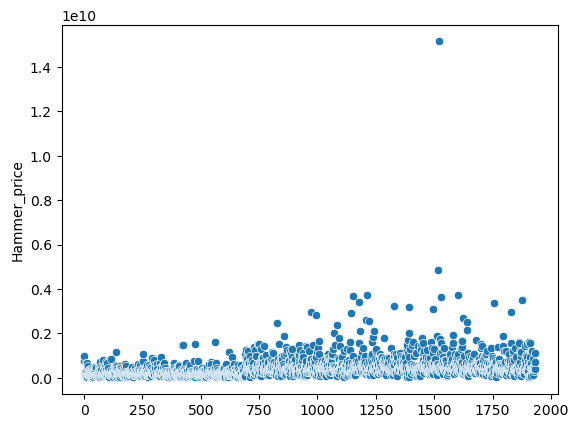

In [455]:
# train['Hammer_price']의 이상치를 확인합니다.

sns.scatterplot(data=train_int, x=train_int.index, y='Hammer_price')

In [456]:
# 이상치의 값의 정보를 확인합니다.

train_int[train_int['Hammer_price'] > 14000000000]

,Auction_key,Claim_price,Auction_count,Auction_miscarriage_count,Total_appraisal_price,Minimum_sales_price,Total_floor,Current_floor,Hammer_price
1521,10,8955865567,4,3,27775000000,14220800000,10,1,15151000000


In [457]:
# 얕은 복사를 통해 이상치를 제거해줍니다.

train_int = train_int[train_int['Hammer_price'] < 14000000000].copy()
train_int

,Auction_key,Claim_price,Auction_count,Auction_miscarriage_count,Total_appraisal_price,Minimum_sales_price,Total_floor,Current_floor,Hammer_price
0,2687,1766037301,2,1,836000000,668800000,45,5,760000000
1,2577,152946867,2,1,1073000000,858400000,70,51,971889999
2,2197,11326510,3,2,119000000,76160000,15,14,93399999
3,2642,183581724,2,1,288400000,230720000,20,11,256899000
4,1958,45887671,2,1,170000000,136000000,7,7,158660000
...,...,...,...,...,...,...,...,...,...
1928,1567,280000000,1,0,401000000,401000000,21,15,402500000
1929,1295,200000000,2,1,454000000,363200000,23,23,430234600
1930,254,354805459,2,1,1285000000,1028000000,32,19,1118999990
1931,1486,80000000,2,1,407000000,325600000,15,11,403000000


In [458]:
# 학습데이터와 테스트데이터 분할을 위해 X, y 변수에 넣어줍니다.
# 'Hammer_price'는 train_test_split을 거칠 때 필요한 '타깃값(정답)'입니다.
# 아래 절차를 거치면 타깃값(정답)인 'Hammer_price' 컬럼이 자동으로 제외됩니다.
# 경매 시 망치를 내려치는 것에서 'Hammer_price'라는 이름이 붙었습니다.

X = train_int.drop(columns='Hammer_price')
y = train_int['Hammer_price']

In [459]:
# train_test_split
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
  X, y, test_size=0.2, random_state=42)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((1545, 8), (387, 8), (1545,), (387,))

In [460]:
# 모델을 불러옵니다. 
# 데이터의 값이 다양하여 시각화를 고려해 랜덤포레스트 회귀모델을 적용하였습니다.

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1)
model

RandomForestRegressor(n_jobs=-1)

In [461]:
# 회귀모델을 데이터셋에 적용시킵니다.
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [462]:
# 예측 점수를 출력해보니 99퍼센트 가까이 나왔습니다.
# 이상치 1개를 제거하기 전에는 56%가량이 나왔었는데, 전처리 과정에서 이정도로 향상되다니 놀랍습니다.

score = model.score(X_valid, y_valid)
score

0.9891134815160392

<AxesSubplot:xlabel='Hammer_price'>

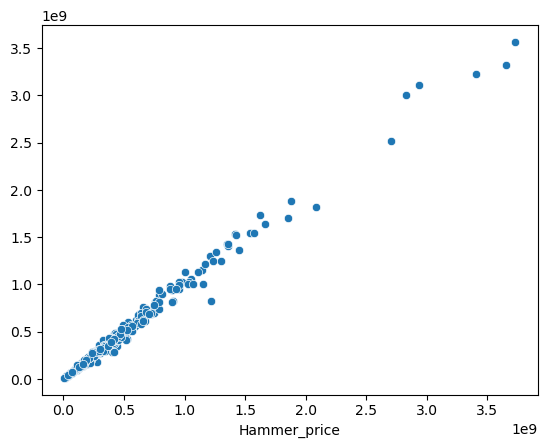

In [463]:
# 예측값의 산점도를 그려줍니다. 선형으로 나열된 수치를 확인할 수 있습니다.
# 예측값과 타깃값 사이의 뚜렷한 상관관계를 확인할 수 있습니다.

sns.scatterplot(x=y_valid, y=model.predict(X_valid))

<AxesSubplot:>

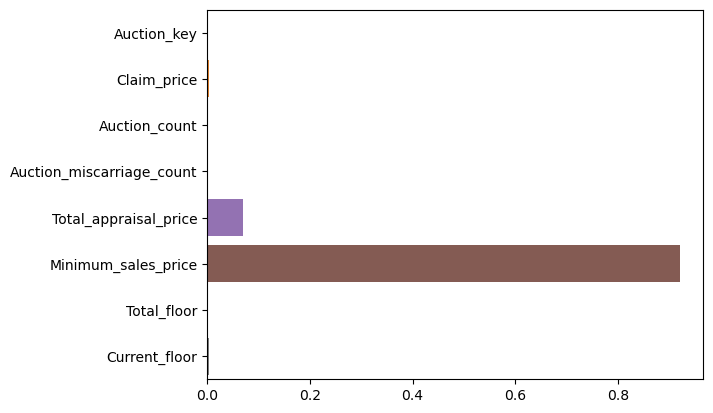

In [464]:
# 피처의 중요도를 시각화합니다.
# 이런, 블랙박스가 드러났습니다. Hammer_price가 주요인이네요.
sns.barplot(x=model.feature_importances_, y=model.feature_names_in_)